<a href="https://colab.research.google.com/github/mbk-dev/okama/blob/master/examples/06%20efficient%20frontier%20single%20period.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

In [ ]:
!pip install okama

In [1]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12.0, 6.0]

import okama as ok

**EfficientFrontier** class can be used for "classic" frontiers where all portfolios are **rebalanced monthly** (single period optimization). It's the most easy and fast way to draw an Efficient Frontier.

### Simple efficient frontier for 2 ETF

In [2]:
ls2 = ["SPY.US", "BND.US"]
curr = "USD"
two_assets = ok.EfficientFrontier(
    assets=ls2, ccy=curr, n_points=100
)  # n_points - specifies a number of points in the Efficient Frontier chart (default is 20)

In [3]:
two_assets

symbols            [SPY.US, BND.US]
currency                        USD
first_date                  2007-05
last_date                   2024-11
period_length    17 years, 7 months
bounds                         None
inflation                      None
n_points                        100
dtype: object

Text representation has **bounds**. It shows which limitations are used for the weights. By default, no limitations are used and weights can be from 0 to 1.0 (0 to 100%). However bounds can be set with `bounds` argument. For instance `bounds=((0, .5), (0, 1))`. Then the weight of SPY will be limited with 50%.

`ef_points` property returns the dataframe (table) for optimized portfolios.  
Each row has risk and return properties of portfolio which could be used to plot the points of the frontier:  
- _Risk_ - the volatility or standard deviation  
- _Mean return_ - the expectation or arithmetic mean  
- _CAGR_ - Compound annual growth rate

All the properties have annualized values.  
Last columns are the weights for each asset.  

In [4]:
df = two_assets.ef_points
df

,Risk,Mean return,CAGR,SPY.US,BND.US
0,0.047569,0.029855,0.028763,4.566157e-10,1.000000e+00
1,0.047569,0.030691,0.029600,1.010101e-02,9.898990e-01
2,0.047621,0.031527,0.030434,2.020202e-02,9.797980e-01
3,0.047725,0.032364,0.031267,3.030303e-02,9.696970e-01
4,0.047882,0.033202,0.032098,4.040404e-02,9.595960e-01
...,...,...,...,...,...
95,0.167628,0.112092,0.099463,9.595960e-01,4.040404e-02
96,0.169390,0.112989,0.100104,9.696970e-01,3.030303e-02
97,0.171157,0.113886,0.100743,9.797980e-01,2.020202e-02
98,0.172929,0.114784,0.101380,9.898990e-01,1.010101e-02


`Plot` class is helpfull to enhance the graph. In this case it's useful to draw the points of the assets with `.plot_assets()` method.

<Axes: >

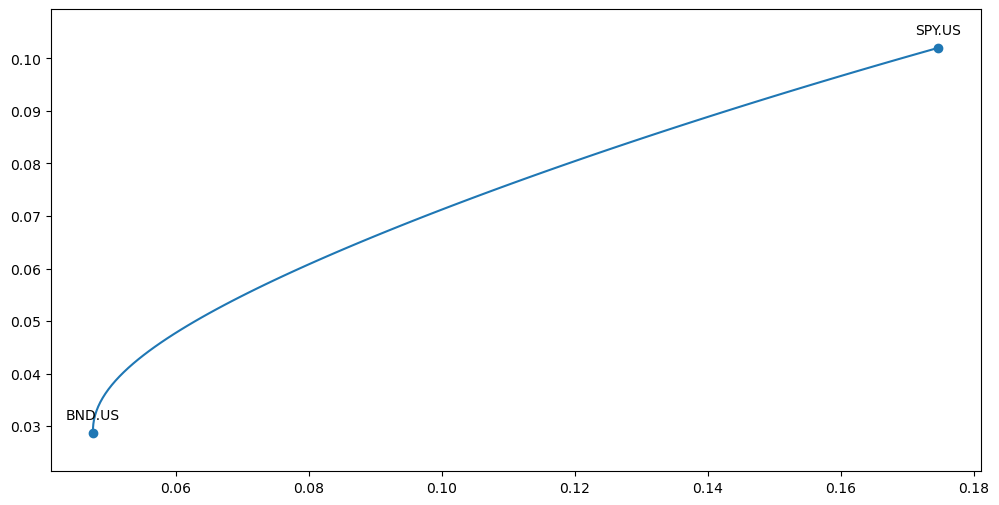

In [5]:
fig, ax = plt.subplots()

# Plotting the Efficient Frontier
ax.plot(df["Risk"], df["CAGR"])

# Plotting the assets
two_assets.plot_assets(kind="cagr")  # kind should be set to "cagr" as we take "CAGR" column from the ef_points.

It's possible to draw both efficient frontiers: for *mean return* and for *CAGR* with the same dataframe.

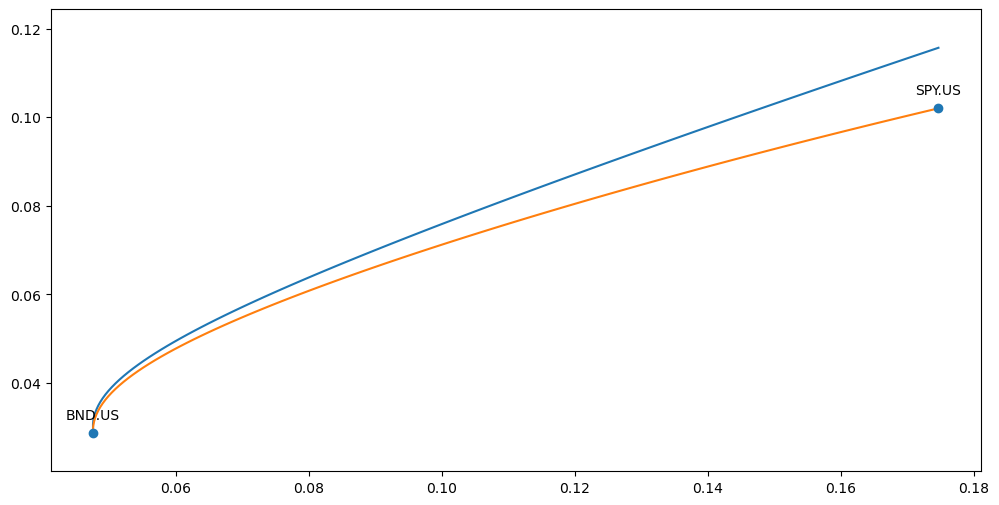

In [6]:
fig, ax = plt.subplots()

# Plotting the Efficient Frontiers
# EF with mean return
ax.plot(df["Risk"], df["Mean return"])
# EF with CAGR
ax.plot(df["Risk"], df["CAGR"])

# Plotting the assets
two_assets.plot_assets(kind="cagr");

### Several assets

Let's add a popular physical gold and real estate ETFs...

In [2]:
ls4 = ["SPY.US", "BND.US", "GLD.US", "VNQ.US"]
curr = "USD"
four_assets = ok.EfficientFrontier(assets=ls4, ccy=curr, n_points=100)
four_assets

symbols                          [SPY.US, BND.US, GLD.US, VNQ.US]
currency                                                      USD
first_date                                                2007-05
last_date                                                 2024-11
period_length                                  17 years, 7 months
bounds           ((0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0))
inflation                                                    None
n_points                                                      100
dtype: object

In [3]:
df4 = four_assets.ef_points

<Axes: >

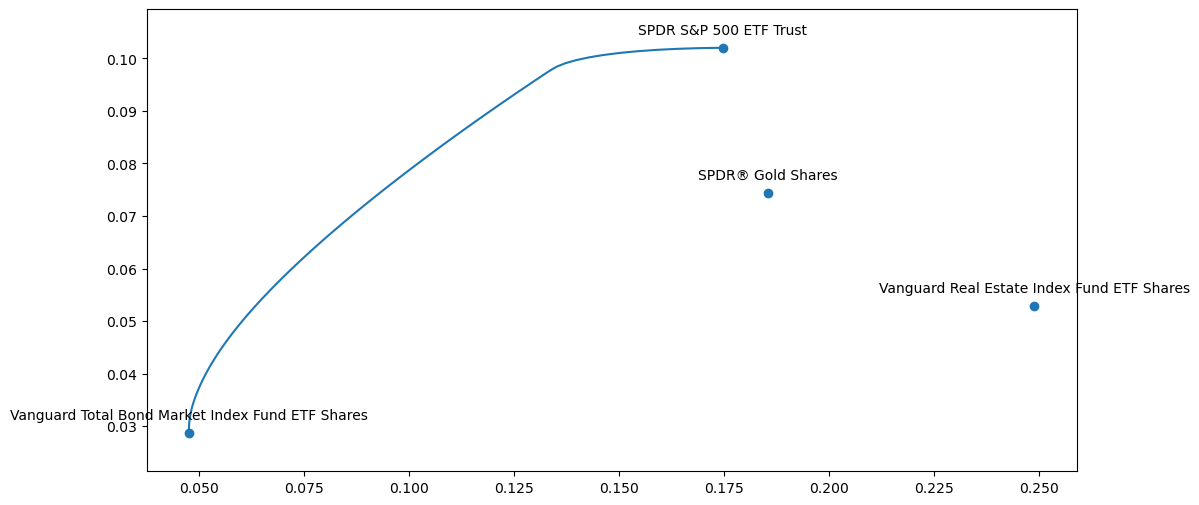

In [4]:
fig, ax = plt.subplots()

# Plotting the Efficient Frontier
ax.plot(df4["Risk"], df4["CAGR"])

# Plotting the assets
four_assets.plot_assets(kind="cagr", tickers="names")  # tickers = "names" is to use assets names instead of tickers

### Efficient Frontier for each pair of assets

Sometimes it can be helpful to see how each pair of assets "contributes" to the common efficient frontier by drawing all the pair frontiers.

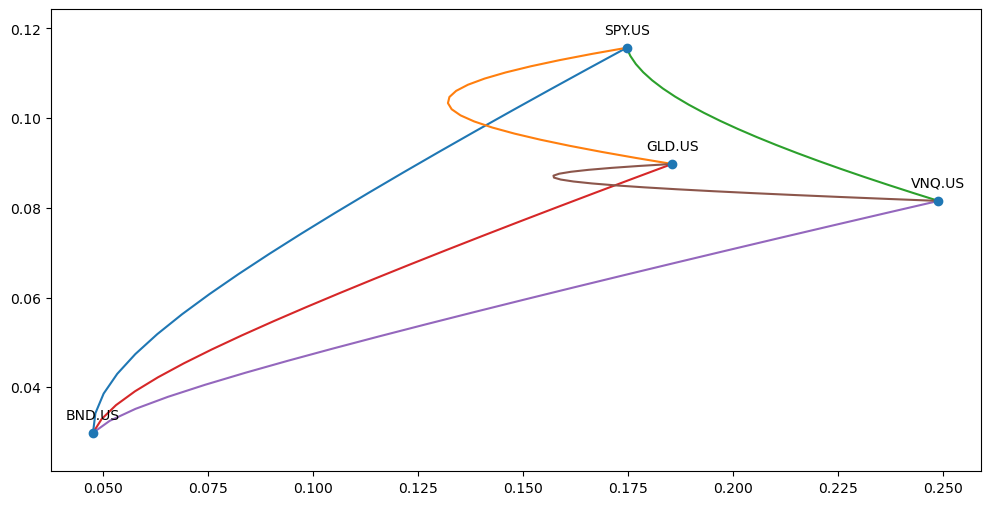

In [5]:
four_assets.plot_pair_ef();

We can see all efficent frontiers (pairs and 4 assets) in a common chart ...

<Figure size 1200x600 with 0 Axes>

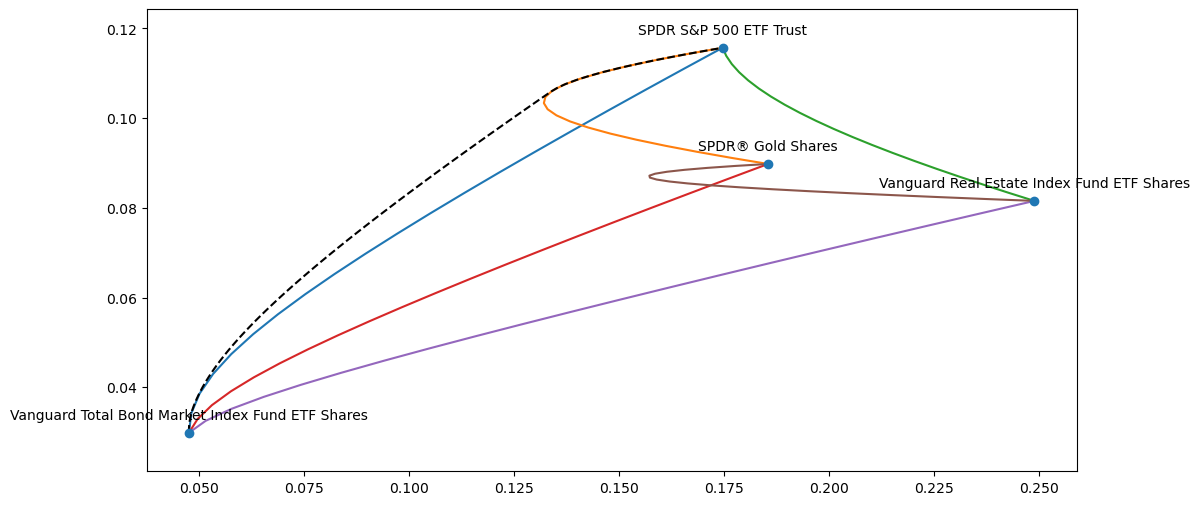

In [6]:
fig = plt.figure()

# Plotting the assets
four_assets.plot_pair_ef(tickers="names")  # annotate with assets names instead

ax = plt.gca()

# Plotting the Efficient Frontier
ax.plot(df4["Risk"], df4["Mean return"], color="black", linestyle="--");

### Global Minimum Variance (GMV) portfolio

GMV weights and values could be found with `gmv_weights`, `gmv_monthly` and `gmv_annualized` methods.

Weights of GMV portfolio:

In [7]:
four_assets.gmv_weights

array([1.19214850e-02, 9.88078515e-01, 4.77048956e-18, 0.00000000e+00])

Risk and mean return on monthly basis:

In [8]:
four_assets.gmv_monthly

(0.013349815733684465, np.float64(0.0025344893188711934))

Risk and mean return annualized:

In [9]:
four_assets.gmv_annualized

(np.float64(0.04757406181692148), np.float64(0.03084143405801898))

With annualized values it's easy to draw the GMV point on the chart.

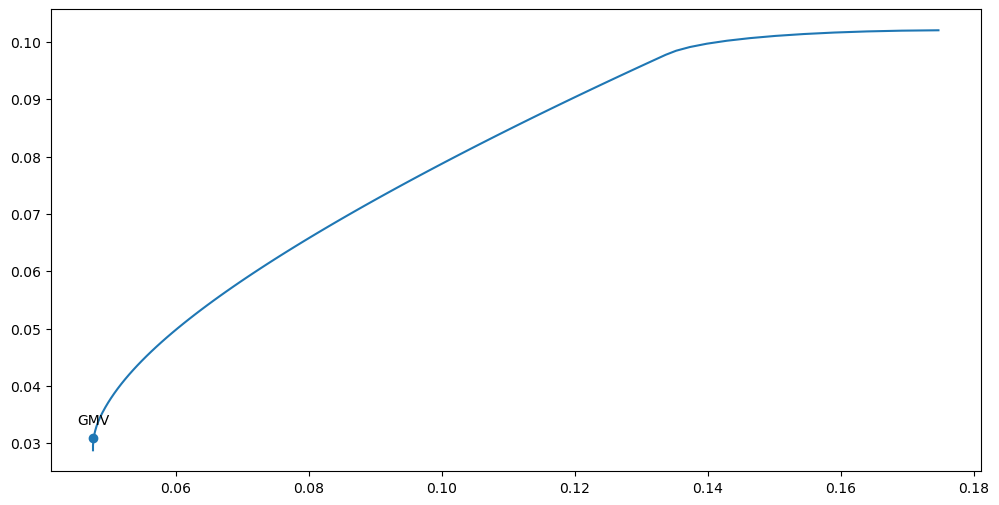

In [10]:
fig, ax = plt.subplots()

# Plotting the Efficient Frontier
ax.plot(df4["Risk"], df4["CAGR"])

# plotting GMV point
ax.scatter(four_assets.gmv_annualized[0], four_assets.gmv_annualized[1])

# annotations for GMV point
ax.annotate(
    "GMV",  # this is the text
    (
        four_assets.gmv_annualized[0],
        four_assets.gmv_annualized[1],
    ),  # this is the point to label
    textcoords="offset points",  # how to position the text
    xytext=(0, 10),  # distance from text to points (x,y)
    ha="center",
);  # horizontal alignment can be left, right or center

### Tangency portfolio and Capital Market Line (CML)

Tangency portfolio or Maximum Sharpe Ratio (MSR) is the point on the Efficient Frontier where **Sharpe Ratio** reaches its maximum.

In [11]:
four_assets.get_tangency_portfolio(rf_return=0.02)  # Risk-Free rate is 2%

{'Weights': array([4.88842847e-01, 2.31403686e-01, 2.79753467e-01, 1.80194401e-16]),
 'Rate_of_return': np.float64(0.08282625513211306),
 'Risk': np.float64(0.1068691669335088)}

The Capital Market Line (CML) is the tangent line drawn from the point of the risk-free asset (volatility is zero) to the Maximum Sharpe Ratio (MSR) point.

The slope of the CML is the Sharpe ratio of the tangency portfolio.

<Axes: >

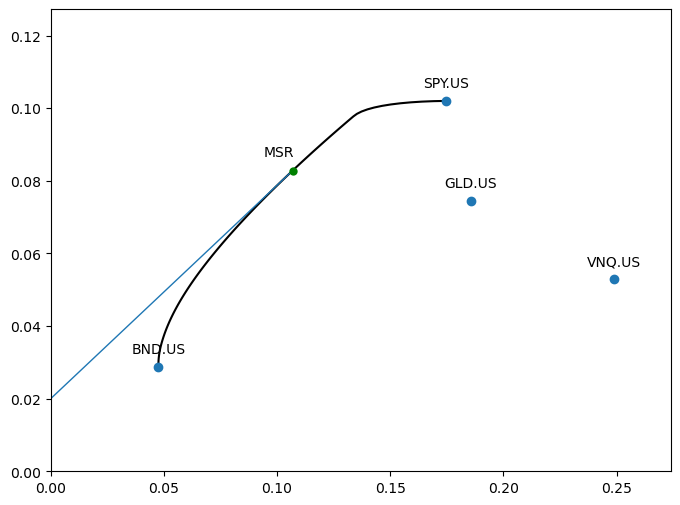

In [12]:
four_assets.plot_cml(rf_return=0.02, figsize=[8, 6])  # Risk-Free rate is 2%

### Most diversified portfolios


The **Diversification Ratio** (DR) is a simple concept popularized by Paul Allen in 2011.
$$DR = \frac{\sum{w_i \times \sigma_i}}{\sigma_p}$$


The DR is the ratio of the weighted average of assets risks divided by the portfolio risk. In this case risk is the annuilized standatd deviation for the rate of return .

The global "most diversified portfolio" is defined as the portfolio with the highest diversification ratio. It's possible to find such portfolio with `get_most_diversified_portfolio()` function:

In [16]:
four_assets.get_most_diversified_portfolio()

{'SPY.US': np.float64(0.21247164586764467),
 'BND.US': np.float64(0.5241914385841382),
 'GLD.US': np.float64(0.2154399922360005),
 'VNQ.US': np.float64(0.04789692331221677),
 'Mean return': np.float64(0.06290505145227887),
 'CAGR': np.float64(0.060062890604275054),
 'Risk': np.float64(0.07772380904596864),
 'Diversification ratio': np.float64(1.4661635343022925)}

The Diversification Ratio can be found for a target rate of return with the same function:

In [17]:
four_assets.get_most_diversified_portfolio(target_return=0.10, monthly_return=False)

{'SPY.US': np.float64(0.4321427645297669),
 'BND.US': np.float64(0.0),
 'GLD.US': np.float64(0.45914080474003),
 'VNQ.US': np.float64(0.10871643073020296),
 'Mean return': np.float64(0.1000000012792237),
 'CAGR': np.float64(0.09162941130432745),
 'Risk': np.float64(0.13549645248344858),
 'Diversification ratio': np.float64(1.3857216758244852)}

`mdp_points` property returns the dataframe (table) for optimized portfolios where the utility function is DR.
Each row has annualized values for risk and return, DR and weights of most diversified portfolios:
- _Diversification ratio_ - the DR for the target return
- _Risk_ - the volatility or standard deviation
- _Mean return_ - the expectation or arithmetic mean
- _CAGR_ - Compound annual growth rate

All the properties have annualized values.
Last columns are the weights for each asset.

In [19]:
four_assets.mdp_points

,Risk,Mean return,CAGR,SPY.US,BND.US,GLD.US,VNQ.US,Diversification ratio
0,0.047569,0.029855,0.028763,0.000000e+00,1.000000e+00,9.549111e-17,4.474101e-13,1.000000
1,0.048554,0.030691,0.029554,0.000000e+00,9.834682e-01,1.006140e-16,1.653179e-02,1.048288
2,0.049790,0.031527,0.030332,1.561251e-16,9.669364e-01,0.000000e+00,3.306358e-02,1.089139
3,0.051152,0.032364,0.031103,1.434399e-16,9.506014e-01,1.267445e-03,4.813115e-02,1.122900
4,0.051808,0.033202,0.031909,0.000000e+00,9.357936e-01,1.237112e-02,5.183530e-02,1.152649
...,...,...,...,...,...,...,...,...
95,0.154450,0.112092,0.101359,8.626321e-01,1.665335e-16,1.373679e-01,0.000000e+00,1.140790
96,0.159046,0.112989,0.101620,8.969741e-01,2.775558e-16,1.030259e-01,0.000000e+00,1.105481
97,0.163971,0.113886,0.101816,9.313160e-01,2.775558e-16,6.868396e-02,0.000000e+00,1.070009
98,0.169198,0.114784,0.101948,9.656580e-01,2.220446e-16,3.434199e-02,0.000000e+00,1.034748


Most diversified portfolios
And finally the line of most diversified portfolios could be plot with the same principle as an Efficient Frontier.

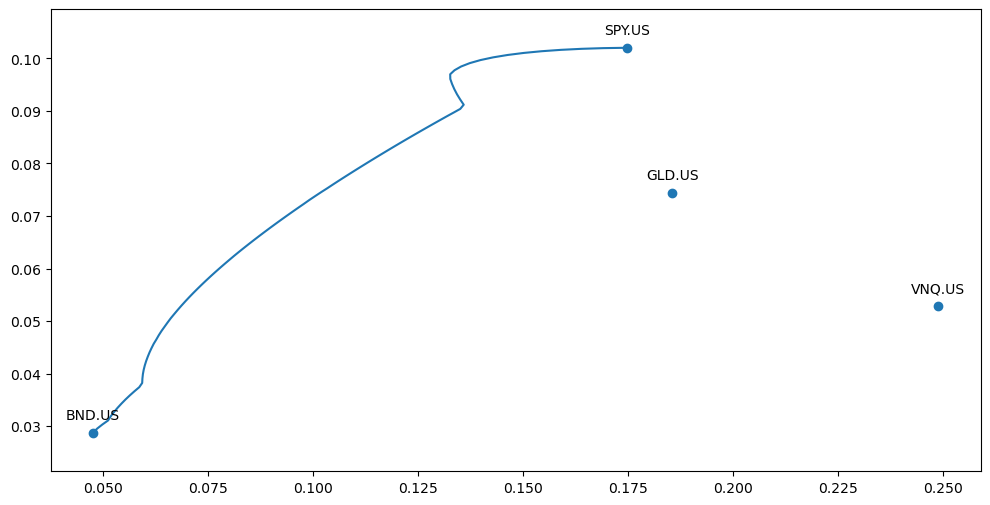

In [20]:
df = four_assets.mdp_points
fig = plt.figure()
four_assets.plot_assets(kind='cagr')
ax = plt.gca()
ax.plot(df['Risk'], df['CAGR'])


Both charts (Efficient Frontier and Most diversified portfolios) could be combined to see the difference.

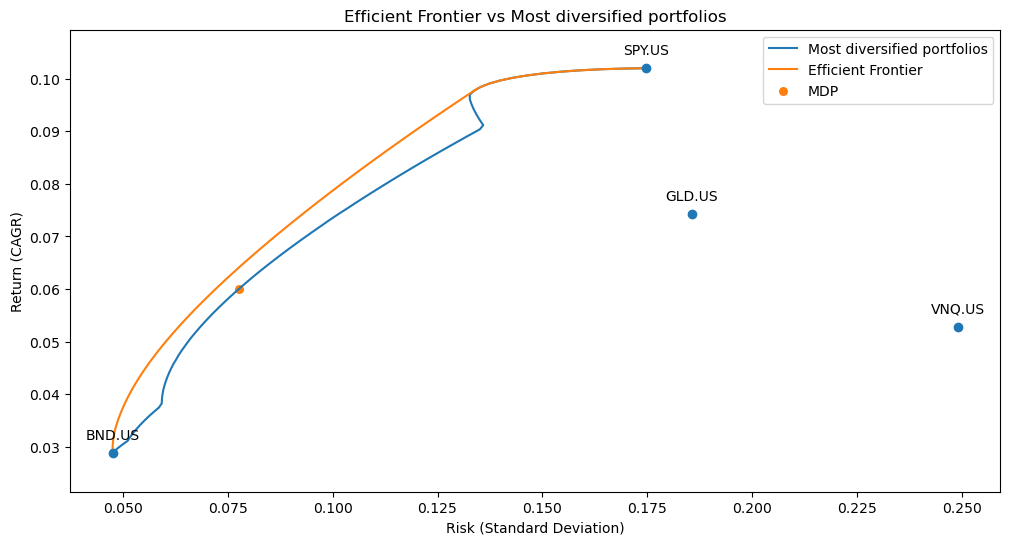

In [25]:
df1 = four_assets.mdp_points  # the set of Most diversified portfolios
df2 = four_assets.ef_points  # the Efficient Frontier points
mdp = four_assets.get_most_diversified_portfolio()  # the global Most diversified portfolio
fig = plt.figure()
four_assets.plot_assets(kind='cagr')
ax = plt.gca()
ax.plot(df1['Risk'], df1['CAGR'], label='Most diversified portfolios')
ax.plot(df2['Risk'], df2['CAGR'], label='Efficient Frontier')
ax.scatter(mdp['Risk'], mdp['CAGR'], s=30, marker='o', label='MDP')
# Set title, legend and labels for axes
ax.set_title('Efficient Frontier vs Most diversified portfolios')
ax.set_xlabel('Risk (Standard Deviation)')
ax.set_ylabel('Return (CAGR)')
ax.legend();

### Monte Carlo simulation for efficient frontier

Monte Carlo simulation is useful to visualize portfolios allocation inside the Efficient Frontier. It generates N random weights and calculates their properties (risk and return metrics).

Let's create a list of popular German stocks, add US bonds ETF (AGG) and spot gold prices (GC.COMM). Portfolios base currency is EUR.

In [18]:
ls5 = ["DBK.XFRA", "SIE.XFRA", "TKA.XFRA", "AGG.US", "GC.COMM"]
curr = "EUR"
gr = ok.EfficientFrontier(
    assets=ls5, ccy=curr, n_points=100
)  # n_points is a number of points in the Efficient Frontier.
gr

symbols            [DBK.XETR, SIE.XETR, TKA.XETR, AGG.US, GC.COMM]
currency                                                       EUR
first_date                                                 2003-10
last_date                                                  2021-08
period_length                                  17 years, 11 months
bounds           ((0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0...
inflation                                                 EUR.INFL
n_points                                                       100
dtype: object

In [19]:
gr.names

{'DBK.XETR': 'Deutsche Bank Aktiengesellschaft',
 'SIE.XETR': 'Siemens Aktiengesellschaft',
 'TKA.XETR': 'thyssenkrupp AG',
 'AGG.US': 'iShares Core U.S. Aggregate Bond ETF',
 'GC.COMM': 'Gold'}

To create a "cloud" of random portfolios **get_monte_carlo** method is used. The number of random portfolios is set with `n=5000` argument (default is 100).

In [20]:
mc = gr.get_monte_carlo(
    n=5000, kind="cagr"
)  # it is possible to choose whether mean return or CAGR is used with "kind" attribute

In [21]:
mc

,CAGR,Risk
0,0.070835,0.200374
1,0.062359,0.150355
2,0.073004,0.213380
3,0.073136,0.135825
4,0.083820,0.128129
...,...,...
4995,0.060696,0.150310
4996,0.050638,0.214231
4997,0.076451,0.150467
4998,0.071321,0.197435


We can plot the random portfolios with matplotlib `scatter` method. To add the assets point to the chart `plot_assets` is used (with Plots class).

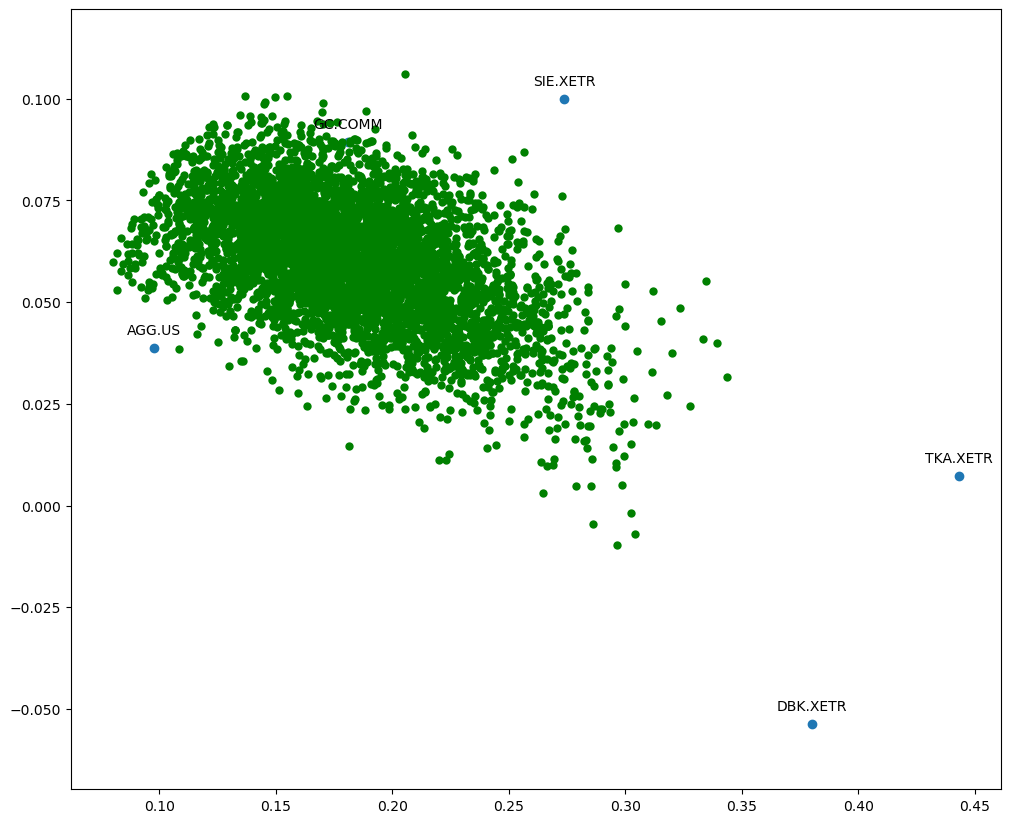

In [22]:
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(bottom=0.2, top=1.5)
gr.plot_assets(kind="cagr")  # plot the assets points
ax = plt.gca()

ax.scatter(mc.Risk, mc.CAGR, linewidth=0, color="green");

As the random portfolios "cloud" usually does not have an obvious shape, sometimes it's worth to draw Monte Carlos simulation together with the Efficient Frontier.

In [23]:
ef = gr.ef_points  # calculate Efficient Frontier points

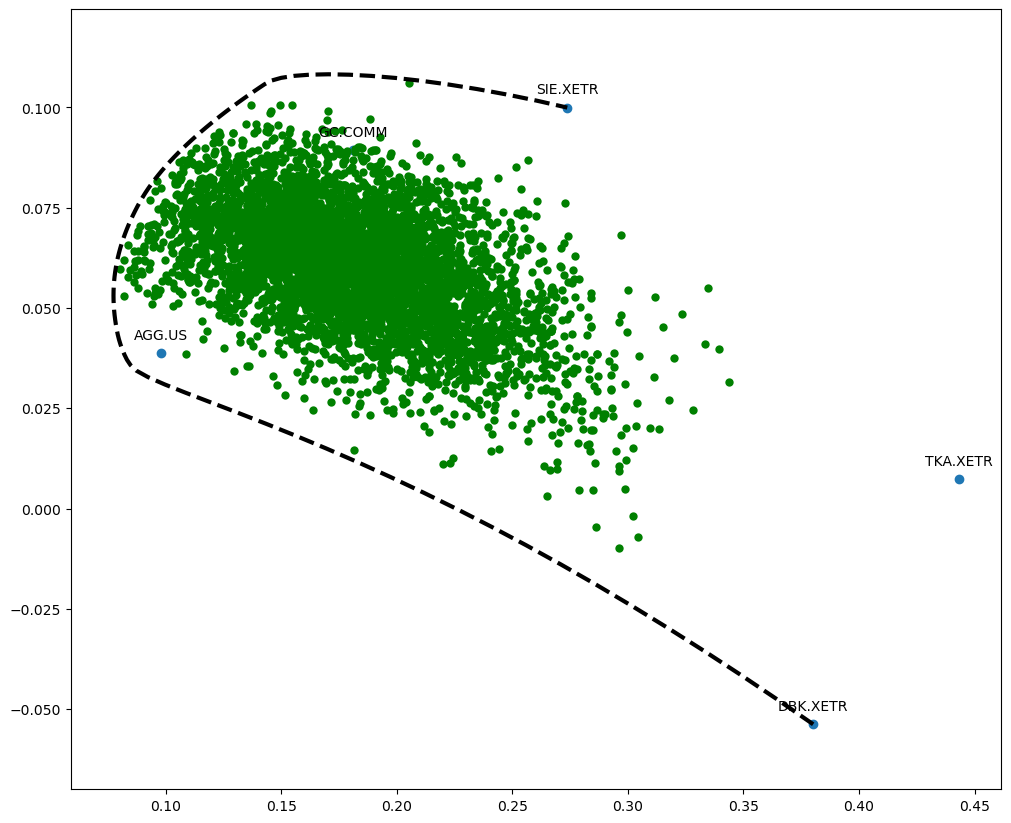

In [24]:
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(bottom=0.2, top=1.5)
gr.plot_assets(kind="cagr")  # plot the assets points
ax = plt.gca()

ax.plot(ef.Risk, ef["CAGR"], color="black", linestyle="dashed", linewidth=3)  # plot the Efficient Frontier

ax.scatter(mc.Risk, mc.CAGR, linewidth=0, color="green");  # plot the Monte Carlo simulation results